In [4]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [54]:
# domains
x = np.logspace(-1.,np.log10(5),50) # [0.1, 5]
y = np.linspace(6,9,50)             # [6, 9]
z = np.linspace(-1,1,50)
c = np.random.rand(50)

In [55]:
# convert to 2d matrices
Z = np.outer(z.T, z)        # 50x50
X, Y = np.meshgrid(x, y)    # 50x50
C = np.outer(c.T, c)

In [56]:
# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = C # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

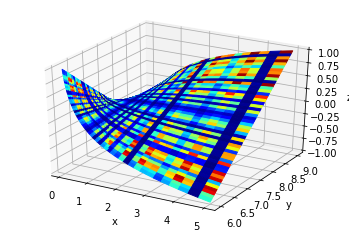

In [57]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.canvas

In [ ]:
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)

In [63]:
def get_princpal_growth(p, rate, time):
    if time == 'd':
        return p * (1 + (rate/365)) - p
    elif time == 'm':
        return p * (1 + (rate/365))**(365/12) - p
    elif time == 'y':
        return p * (1 + (rate/365))**365 - p


def get_incured_interest(initial_ammount, rate, monthly_payment, min_payment):
    principal = initial_ammount

    mesh_interest = []
    for payment_ammount in monthly_payment:
        principal = initial_ammount
        total_interest = 0
        while(principal > 0):       
            interest = get_princpal_growth(principal, rate, 'm')
            total_interest+=interest
            principal = principal + interest - (min_payment + payment_ammount)
            
        mesh_interest.append(total_interest)
    
    return np.array(mesh_interest)


def get_total_months(initial_ammount, rate, monthly_payment, min_payment):
    to_mesh_eta = []
    
    for payment_ammount in monthly_payment:
        month = 0
        principal = initial_ammount
        
        while(principal > 0):       
            interest = get_princpal_growth(principal, rate, 'm')
            principal = principal + interest - (min_payment + payment_ammount)
            month+=1
            
        to_mesh_eta.append(month)
    
    return np.array(to_mesh_eta)

def get_total_payment(p, r ,payment, min_payment):
    total_interest = get_incured_interest(p, r, payment, min_payment)
    return p + total_interest

In [64]:
ppl = 88298
fsl = 19500

ppl_rate = .07
fsl_rate = .0466

ppl_min_pay = 797
fsl_min_pay = 204

In [119]:
x = np.arange(0, 1000, 1)
y = np.arange(0, 1000, 1)

# total payment
ppl_total = get_total_payment(ppl, ppl_rate, x, ppl_min_pay)
fsl_total = get_total_payment(fsl, fsl_rate, y, fsl_min_pay)

# PAYMENT DURATION 
ppl_time = get_total_months(ppl, ppl_rate, x, ppl_min_pay)/12
fsl_time = get_total_months(fsl, fsl_rate, y, fsl_min_pay)/12

X,Y = np.meshgrid(x, y)

PPL_TOTAL, FSL_TOTAL = np.meshgrid(ppl_total, fsl_total)
PPL_TIME, FSL_TIME = np.meshgrid(ppl_time, fsl_time)

Z = PPL_TOTAL + FSL_TOTAL
C = PPL_TIME

In [130]:
# min payment duration in years
print(fsl_time[-750])
print(ppl_time[-1])

4.0
4.916666666666667


In [124]:
# max payment duration in years
print(fsl_time[0])
print(ppl_time[0])

10.0
15.0


In [120]:
# fourth dimention - colormap
color_dimension = C # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

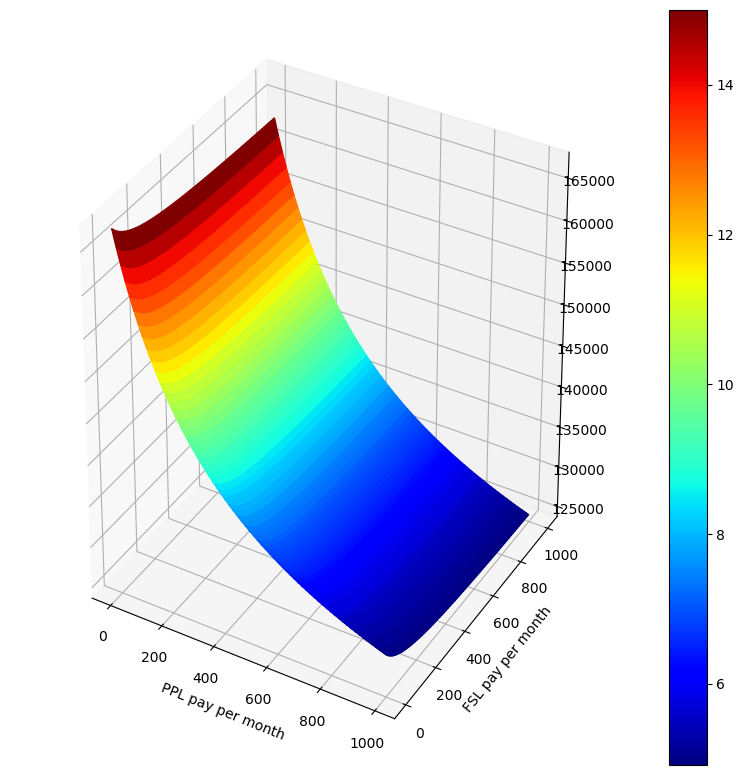

In [123]:
width_of_panel = 10
height_of_panel = 10


d = 100
fig = plt.figure(figsize=(width_of_panel, height_of_panel), dpi=d)
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=15, cstride=15, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('PPL pay per month')
ax.set_ylabel('FSL pay per month')
ax.set_zlabel('')
fig.colorbar(m)
fig.canvas